In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
api_key = api_keys.api_key
now = datetime.datetime.now().strftime('%m/%d/%y')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#df = pd.DataFrame(cities, index=cities,columns=['City'])
df = pd.DataFrame({'City': cities})
df['City ID'] = ''
df['Latitude'] = ''
df['Longitude'] = ''
df['Temperature'] = ''
df['Humidity'] = ''
df['Cloudiness'] = ''
df['Windspeed'] = ''
df.head()

,City,City ID,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,new norfolk,,,,,,,
1,bundaberg,,,,,,,
2,mys shmidta,,,,,,,
3,nikolskoye,,,,,,,
4,rikitea,,,,,,,


## Perform API Calls

In [3]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



for index, row in df.iterrows():

    c = row['City']
    url = f'{base_url}&q={c}'
    response = requests.get(url).json()
    try:
        print('Processing city %s city id %s' %(c,response['id']))
        df.loc[index,'City ID'] = response['id']
        df.loc[index,'Latitude'] = response['coord']['lat']
        df.loc[index,'Longitude'] = response['coord']['lon']
        df.loc[index,'Temperature']  = response['main']['temp_max']
        df.loc[index,'Humidity'] = response['main']['humidity']
        df.loc[index,'Cloudiness'] = response['clouds']['all']
        df.loc[index,'Windspeed'] = response['wind']['speed']
    except KeyError:
        print(f'No such city {c} found in Open Weather Map Database')
        
    
df
df_samples = df.sample(n=500)


Processing city new norfolk city id 2155415
Processing city bundaberg city id 2173323
No such city mys shmidta found in Open Weather Map Database
Processing city nikolskoye city id 546105
Processing city rikitea city id 4030556
Processing city castro city id 3896218
Processing city punta arenas city id 3874787
Processing city jamestown city id 2069194
Processing city hithadhoo city id 1282256
Processing city tasiilaq city id 3424607
Processing city bredasdorp city id 1015776
Processing city nioro city id 2413070
Processing city palu city id 1633034
Processing city hermanus city id 3366880
Processing city butaritari city id 2110227
No such city mullaitivu found in Open Weather Map Database
No such city barentsburg found in Open Weather Map Database
Processing city mar del plata city id 3863379
Processing city torbay city id 6167817
Processing city qaanaaq city id 3831208
Processing city sembakung city id 1627877
No such city belushya guba found in Open Weather Map Database
Processing ci

Processing city severo-kurilsk city id 2121385
Processing city saldanha city id 2737599
Processing city port hedland city id 2063042
Processing city kotido city id 230617
Processing city benghazi city id 88319
Processing city eureka city id 5563397
Processing city qasigiannguit city id 3420768
No such city tarudant found in Open Weather Map Database
No such city tumannyy found in Open Weather Map Database
Processing city leningradskiy city id 2123814
Processing city san ramon city id 3616584
Processing city matagami city id 2335713
Processing city hirna city id 334700
Processing city babol city id 142363
Processing city buckeye city id 5287262
Processing city sao jose da coroa grande city id 3388456
Processing city itoman city id 1861280
Processing city ixtapa city id 4004293
Processing city mirnyy city id 502265
Processing city general roca city id 3855065
Processing city high rock city id 3572189
Processing city ambilobe city id 1082243
Processing city batemans bay city id 2176639
Pr

Processing city ukiah city id 5404476
Processing city oistins city id 3373652
Processing city faisalabad city id 1179400
Processing city calvinia city id 3369174
Processing city ahtopol city id 729125
Processing city yekaterinovka city id 488635
Processing city sangar city id 2017215
Processing city letterkenny city id 2962961
No such city karauzyak found in Open Weather Map Database
Processing city margherita city id 1263532
Processing city kandrian city id 2094746
Processing city jahangirabad city id 1269551
Processing city new amsterdam city id 3376762
Processing city la ronge city id 6050066
Processing city nago city id 3172402
Processing city florence city id 4062577
Processing city knysna city id 988698
No such city banmo found in Open Weather Map Database
Processing city shamkhal city id 495893
Processing city metro city id 1635283
Processing city loandjili city id 2258378
Processing city hoquiam city id 5797693
Processing city atar city id 2381334
Processing city begoro city id

Processing city rochefort city id 2983276
Processing city am timan city id 245338
Processing city antananarivo city id 1070940
Processing city riyadh city id 108410
Processing city mitu city id 117392
Processing city buncrana city id 2654332
Processing city fare city id 4034496
Processing city boguchar city id 575457
Processing city aojiang city id 1812613
Processing city yenagoa city id 2318123
Processing city banamba city id 2460546
Processing city port hardy city id 6111862
Processing city ayan city id 749747
Processing city aykhal city id 2027296
Processing city teno city id 3869979
Processing city thinadhoo city id 1337610
Processing city algete city id 3130383
Processing city vallenar city id 3868633
No such city bardiyah found in Open Weather Map Database
Processing city stettler city id 6156307
Processing city apollonia city id 736694
Processing city mabai city id 1818004
Processing city kuching city id 1735634
Processing city nemuro city id 2128975
Processing city koutiala cit

In [4]:
df['City ID'].count()
df_samples.replace('',np.nan,inplace=True)
df_samples.dropna(inplace=True)




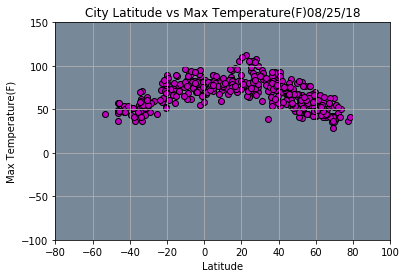

In [5]:

fig,ax = plt.subplots()
ax.scatter(df_samples['Latitude'],df_samples['Temperature'],edgecolors='k',c='m')
ax.grid()
ax.set_ylim(-100,150)
ax.set_xlim(-80,100)
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature(F)')
ax.set_title(f'City Latitude vs Max Temperature(F){now}')
ax.set_facecolor('lightslategray')
fig.savefig('LatVsTemp.png')


In [6]:
plt.show()



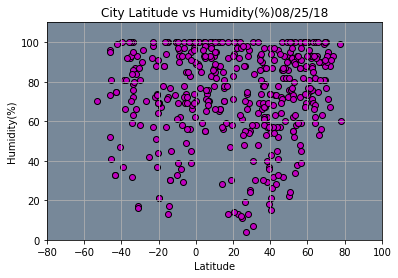

In [7]:
fig,ax = plt.subplots()
ax.scatter(df_samples['Latitude'],df_samples['Humidity'],edgecolors='k',c='m')
ax.grid()
ax.set_ylim(0,110)
ax.set_xlim(-80,100)
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity(%)')
ax.set_title(f'City Latitude vs Humidity(%){now}')
ax.set_facecolor('lightslategray')
fig.savefig('LatVsHumidity.png')

In [8]:
plt.show()

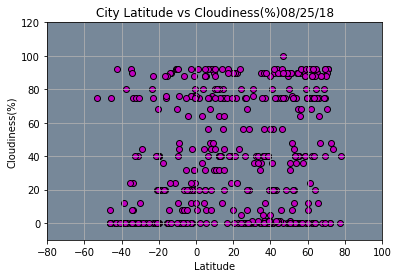

In [9]:
fig,ax = plt.subplots()
ax.scatter(df_samples['Latitude'],df_samples['Cloudiness'],edgecolors='k',c='m')
ax.grid()
ax.set_ylim(-10,120)
ax.set_xlim(-80,100)
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness(%)')
ax.set_title(f'City Latitude vs Cloudiness(%){now}')
ax.set_facecolor('lightslategray')
fig.savefig('LatVsCloudiness.png')

In [10]:
plt.show()

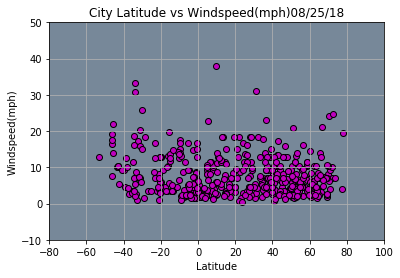

In [11]:
fig,ax = plt.subplots()
ax.scatter(df_samples['Latitude'],df_samples['Windspeed'],edgecolors='k',c='m')
ax.grid()
ax.set_ylim(-10,50)
ax.set_xlim(-80,100)
ax.set_xlabel('Latitude')
ax.set_ylabel('Windspeed(mph)')
ax.set_title(f'City Latitude vs Windspeed(mph){now}')
ax.set_facecolor('lightslategray')
fig.savefig('LatVsWindspeed.png')
plt.show()

In [12]:
df_samples.to_csv('Output.csv')